2025/07/30 08:46:11 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/07/30 08:46:20 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 1, Current best: 0.11457412319481275, Global best: 0.11457412319481275, Runtime: 9.54555 seconds
2025/07/30 08:46:23 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 2, Current best: 0.10597799390902851, Global best: 0.10597799390902851, Runtime: 3.00312 seconds
2025/07/30 08:46:32 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 3, Current best: 0.10023086747224674, Global best: 0.10023086747224674, Runtime: 9.22246 seconds
2025/07/30 08:46:42 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 4, Current best: 0.10023086747224674, Global best: 0.10023086747224674, Runtime: 9.22887 seconds
2025/07/30 08:46:53 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 5, Current best: 0.10023086747224674, Global best: 0.1002308674722467


✅ Best fitness (1 - accuracy): 0.10023086747224674
✅ Estimated accuracy: 0.8997691325277533
✅ Number of selected features: 19
✅ Selected feature indices: [ 5  6 11 12 13 14 16 19 22 25 26 28 31 32 33 39 41 44 46]

🔄 Running Nested Cross-Validation...
Fold accuracy: 0.8857
Fold accuracy: 0.9000
Fold accuracy: 0.9286
Fold accuracy: 0.8429
Fold accuracy: 0.9275

✅ Nested CV mean accuracy: 0.8969 ± 0.0316

✅ Final model hyperparameters: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

📊 Final Test Accuracy: 0.8857142857142857

📋 Final Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.88        51
           1       0.85      0.94      0.89        54

    accuracy                           0.89       105
   macro avg       0.89      0.88      0.88       105
weighted avg       0.89      0.89      0.89       105


🔍 Final Confusion Matrix:
 [[42  9]
 [ 3 51]]


c:\Users\rahat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rahat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rahat\AppData\Local\Programs\Python\Python311\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, u

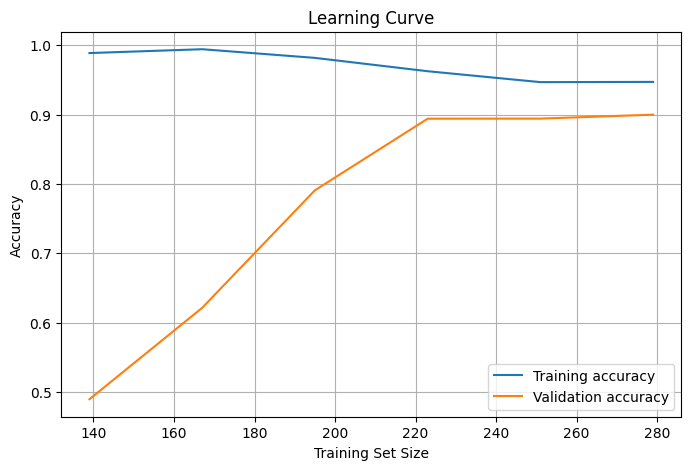

In [1]:
# # 1. Import Libraries
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from catboost import CatBoostClassifier
# from mealpy.swarm_based.PSO import OriginalPSO
# from mealpy.utils.problem import Problem

# # 2. Load Dataset
# df = pd.read_csv("../Datasets/ovariantotal.csv")  # Adjust path if needed
# X = df.iloc[:, :-1].values  # all columns except last (assumed label)
# y = df.iloc[:, -1].values

# # 3. Scale Features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 4. Define Fitness Function with <20 features constraint
# def fitness(solution):
#     binary_solution = np.where(solution > 0.5, 1, 0)
#     n_feats = np.sum(binary_solution)
#     if n_feats == 0 or n_feats > 19:
#         return 1.0  # Penalize empty or too-large subsets
    
#     X_sel = X_scaled[:, binary_solution == 1]

#     # Use 3-fold stratified CV for speed
#     cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

#     # Minimal GridSearch for speed
#     param_grid = {
#         'depth': [4, 6],
#         'learning_rate': [0.05],
#         'iterations': [100]
#     }
#     model = CatBoostClassifier(verbose=0, random_state=42)
#     grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
#     grid.fit(X_sel, y, early_stopping_rounds=20, eval_set=[(X_sel, y)])

    
#     best_score = grid.best_score_
#     return 1 - best_score  # minimize error

# # 5. Setup Problem for PSO
# problem = Problem(
#     fit_func=fitness,
#     lb=[0] * X.shape[1],
#     ub=[1] * X.shape[1],
#     minmax="min",
#     verbose=True
# )

# # 6. Run PSO (Reduced epoch and pop_size for speed)


# pso = OriginalPSO(
#     epoch=15,
#     pop_size=10,
#     c1=2.0,
#     c2=2.0,
#     w_min=0.4,
#     w_max=0.9
# )

# best_position, best_fitness = pso.solve(problem)

# print("\n✅ Best fitness (1 - accuracy):", best_fitness)
# print("✅ Estimated accuracy:", 1 - best_fitness)

# selected_mask = np.where(best_position > 0.5, 1, 0)
# print("✅ Number of selected features:", np.sum(selected_mask))
# print("✅ Selected feature indices:", np.where(selected_mask == 1)[0])

# # 7. Train/Test Split on Selected Features
# X_selected = X_scaled[:, selected_mask == 1]
# X_train, X_test, y_train, y_test = train_test_split(
#     X_selected, y, test_size=0.2, stratify=y, random_state=42
# )

# # 8. Train Final CatBoost Model (using best param from grid search)
# final_model = CatBoostClassifier(
#     depth=6,
#     learning_rate=0.05,
#     iterations=100,
#     verbose=0,
#     random_state=42
# )
# final_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=(X_test, y_test))

# # 9. Evaluate on Test Set
# y_pred = final_model.predict(X_test)

# print("\n📊 Test Accuracy:", accuracy_score(y_test, y_pred))
# print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
# print("\n🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#/////////////////////////////

# 1. Import Libraries
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, learning_curve
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from catboost import CatBoostClassifier
# from mealpy.swarm_based.PSO import OriginalPSO
# from mealpy.utils.problem import Problem
# import matplotlib.pyplot as plt

# # 2. Load Dataset
# df = pd.read_csv("../Datasets/ovariantotal.csv")  # Adjust path as needed
# X = df.iloc[:, :-1].values  # Features
# y = df.iloc[:, -1].values   # Labels

# # 3. Scale Features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 4. Define Fitness Function (without early stopping in GridSearchCV)
# def fitness(solution):
#     binary_solution = np.where(solution > 0.5, 1, 0)
#     n_feats = np.sum(binary_solution)
#     if n_feats == 0 or n_feats > 19:
#         return 1.0  # Penalize empty or too-large subsets
    
#     X_sel = X_scaled[:, binary_solution == 1]

#     cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#     param_grid = {
#         'depth': [4, 6],
#         'learning_rate': [0.05],
#         'iterations': [100]
#     }
#     model = CatBoostClassifier(verbose=0, random_state=42)

#     # GridSearchCV without early stopping (not supported here)
#     grid = GridSearchCV(model, param_grid, cv=cv_inner, scoring='accuracy', n_jobs=-1)
#     grid.fit(X_sel, y)
    
#     best_score = grid.best_score_
#     return 1 - best_score  # minimize error

# # 5. Setup Problem for PSO
# problem = Problem(
#     fit_func=fitness,
#     lb=[0] * X.shape[1],
#     ub=[1] * X.shape[1],
#     minmax="min",
#     verbose=True
# )

# # 6. Run PSO (tune epochs/pop_size as needed)
# pso = OriginalPSO(
#     epoch=15,
#     pop_size=20,
#     c1=2.0,
#     c2=2.0,
#     w_min=0.4,
#     w_max=0.9
# )

# best_position, best_fitness = pso.solve(problem)

# print("\n✅ Best fitness (1 - accuracy):", best_fitness)
# print("✅ Estimated accuracy:", 1 - best_fitness)

# selected_mask = np.where(best_position > 0.5, 1, 0)
# print("✅ Number of selected features:", np.sum(selected_mask))
# print("✅ Selected feature indices:", np.where(selected_mask == 1)[0])

# # 7. Nested Cross-Validation to evaluate final selected features + tuned CatBoost

# X_selected = X_scaled[:, selected_mask == 1]

# outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# param_grid = {
#     'depth': [4, 6],
#     'learning_rate': [0.05, 0.1],
#     'iterations': [100, 200]
# }

# accuracies = []

# print("\n🔄 Running Nested Cross-Validation...")

# for train_idx, test_idx in outer_cv.split(X_selected, y):
#     X_train, X_test = X_selected[train_idx], X_selected[test_idx]
#     y_train, y_test = y[train_idx], y[test_idx]

#     model = CatBoostClassifier(verbose=0, random_state=42)

#     grid = GridSearchCV(model, param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1)
#     grid.fit(X_train, y_train)

#     best_model = grid.best_estimator_

#     y_pred = best_model.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     accuracies.append(acc)

#     print(f"Fold accuracy: {acc:.4f}")

# print(f"\n✅ Nested CV mean accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")

# # 8. Train final model on full data with selected features and best params from nested CV

# # Use best params from last fold grid search (or set manually)
# final_params = grid.best_params_
# print("\n✅ Final model hyperparameters:", final_params)

# final_model = CatBoostClassifier(
#     depth=final_params['depth'],
#     learning_rate=final_params['learning_rate'],
#     iterations=final_params['iterations'],
#     verbose=0,
#     random_state=42
# )

# # Split train-test for final evaluation
# X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
#     X_selected, y, test_size=0.2, stratify=y, random_state=42
# )

# final_model.fit(X_train_final, y_train_final, early_stopping_rounds=20, eval_set=(X_test_final, y_test_final))

# y_pred_final = final_model.predict(X_test_final)

# print("\n📊 Final Test Accuracy:", accuracy_score(y_test_final, y_pred_final))
# print("\n📋 Final Classification Report:\n", classification_report(y_test_final, y_pred_final))
# print("\n🔍 Final Confusion Matrix:\n", confusion_matrix(y_test_final, y_pred_final))

# # 9. Learning Curve Plot
# train_sizes, train_scores, val_scores = learning_curve(
#     final_model, X_selected, y, cv=outer_cv, scoring='accuracy', n_jobs=-1,
#     train_sizes=np.linspace(0.1, 1.0, 10), verbose=0
# )

# train_mean = np.mean(train_scores, axis=1)
# val_mean = np.mean(val_scores, axis=1)

# plt.figure(figsize=(8,5))
# plt.plot(train_sizes, train_mean, label="Training accuracy")
# plt.plot(train_sizes, val_mean, label="Validation accuracy")
# plt.xlabel("Training Set Size")
# plt.ylabel("Accuracy")
# plt.title("Learning Curve")
# plt.legend()
# plt.grid()
# plt.show()

# /////////////////////

# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier
from mealpy.swarm_based.PSO import OriginalPSO
from mealpy.utils.problem import Problem
import matplotlib.pyplot as plt

# 2. Load Dataset
df = pd.read_csv("../Datasets/ovariantotal.csv")  # Adjust path as needed
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Labels

# 3. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Define Fitness Function with error handling and feature number constraint
def fitness(solution):
    binary_solution = np.where(solution > 0.5, 1, 0)
    n_feats = np.sum(binary_solution)
    # Penalize empty or too-large subsets
    if n_feats == 0 or n_feats > 19:
        return 1.0

    X_sel = X_scaled[:, binary_solution == 1]

    # Check if selected subset has at least 2 classes; else penalize
    if len(np.unique(y)) != 2:
        return 1.0
    if len(np.unique(y)) == 2 and (np.min(np.bincount(y)) < 2):
        return 1.0

    # Use 3-fold stratified CV inside fitness for evaluation
    cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    param_grid = {
        'depth': [4, 6],
        'learning_rate': [0.05],
        'iterations': [100]
    }
    model = CatBoostClassifier(verbose=0, random_state=42)

    try:
        # No early stopping here (GridSearchCV incompatible with it)
        grid = GridSearchCV(model, param_grid, cv=cv_inner, scoring='accuracy', n_jobs=-1)
        grid.fit(X_sel, y)
        best_score = grid.best_score_
        return 1 - best_score  # minimize error
    except Exception as e:
        # If training fails (e.g. only one class in fold), penalize
        return 1.0

# 5. Setup Problem for PSO
problem = Problem(
    fit_func=fitness,
    lb=[0] * X.shape[1],
    ub=[1] * X.shape[1],
    minmax="min",
    verbose=True
)

# 6. Run PSO
pso = OriginalPSO(
    epoch=15,
    pop_size=20,
    c1=2.0,
    c2=2.0,
    w_min=0.4,
    w_max=0.9
)

best_position, best_fitness = pso.solve(problem)

print("\n✅ Best fitness (1 - accuracy):", best_fitness)
print("✅ Estimated accuracy:", 1 - best_fitness)

selected_mask = np.where(best_position > 0.5, 1, 0)
print("✅ Number of selected features:", np.sum(selected_mask))
print("✅ Selected feature indices:", np.where(selected_mask == 1)[0])

# 7. Nested Cross-Validation with final selected features and hyperparameter tuning
X_selected = X_scaled[:, selected_mask == 1]

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'depth': [4, 6],
    'learning_rate': [0.05, 0.1],
    'iterations': [100, 200]
}

accuracies = []

print("\n🔄 Running Nested Cross-Validation...")

for train_idx, test_idx in outer_cv.split(X_selected, y):
    X_train, X_test = X_selected[train_idx], X_selected[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = CatBoostClassifier(verbose=0, random_state=42)

    grid = GridSearchCV(model, param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Fold accuracy: {acc:.4f}")

print(f"\n✅ Nested CV mean accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")

# 8. Train final model on full dataset using selected features & best hyperparameters from last grid search

final_params = grid.best_params_
print("\n✅ Final model hyperparameters:", final_params)

final_model = CatBoostClassifier(
    depth=final_params['depth'],
    learning_rate=final_params['learning_rate'],
    iterations=final_params['iterations'],
    verbose=0,
    random_state=42
)

# Split train-test for final evaluation
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_selected, y, test_size=0.3, stratify=y, random_state=42
)

final_model.fit(X_train_final, y_train_final, early_stopping_rounds=20, eval_set=(X_test_final, y_test_final))

y_pred_final = final_model.predict(X_test_final)

print("\n📊 Final Test Accuracy:", accuracy_score(y_test_final, y_pred_final))
print("\n📋 Final Classification Report:\n", classification_report(y_test_final, y_pred_final))
print("\n🔍 Final Confusion Matrix:\n", confusion_matrix(y_test_final, y_pred_final))

# 9. Plot Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    final_model, X_selected, y, cv=outer_cv, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), verbose=0
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, label="Training accuracy")
plt.plot(train_sizes, val_mean, label="Validation accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

